In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [4]:

df_colesterol.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    str    
 2   Fumante             997 non-null    str    
 3   Nível de Atividade  996 non-null    str    
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), str(3)
memory usage: 62.6 KB


In [5]:
# Remover Coluna ID

df_colesterol.drop(columns=['Id'], axis='columns', inplace=True)

In [ ]:
# Renomear as colunas
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',  
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

In [7]:
df_colesterol.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         996 non-null    str    
 1   fumante                 997 non-null    str    
 2   nivel_atividade_fisica  996 non-null    str    
 3   idade                   997 non-null    float64
 4   peso                    997 non-null    float64
 5   altura                  997 non-null    float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), str(3)
memory usage: 54.8 KB


In [8]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [9]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

## INICIO DE EDA 

Discutimos sobre a escolha adequada de medidas estatísticas para tratar valores ausentes em um DataFrame. Primeiramente, analisamos as medidas estatísticas das variáveis numéricas, como idade, peso e altura, e identificamos possíveis outliers. Em seguida, concluímos que a mediana seria uma escolha mais adequada para tratar valores ausentes, pois ela é menos sensível a outliers. Para as variáveis categóricas, utilizamos a moda, ou seja, o valor mais frequente da base. Demonstramos como realizar a imputação desses valores ausentes no DataFrame, coletando as medidas estatísticas e preenchendo os valores de uma vez só. Por fim, ressaltamos a importância de verificar o domínio dos tipos possíveis das variáveis categóricas e a necessidade de converter as variáveis numéricas para o tipo adequado.

In [27]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
10,A,Sim,Baixo,57,123.6,183,283.87


In [28]:
df_colesterol_eda.nivel_atividade_fisica.unique()

<StringArray>
['Baixo', 'Moderado', 'Alto']
Length: 3, dtype: str

In [ ]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [30]:
# Medidas estatisticas do DF
# Lembresse que usar a mediana para casos de outliers, em casos normais é possivel usar a media

df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,963.000000,963.000000,963.000000,963.000000
mean,49.186916,78.166355,175.026999,203.588027
std,17.518875,19.971319,8.826539,46.739475
min,20.000000,40.400000,160.000000,102.200000
25%,34.000000,63.850000,167.000000,170.595000
50%,49.000000,76.600000,175.000000,201.980000
75%,65.000000,91.000000,183.000000,235.335000
max,79.000000,158.100000,190.000000,372.670000


In [31]:
# Coletar medidas das variaveis categoricaS

moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [32]:
# Coletar medidas das variaveis numerifcas

mediana_idade = df_colesterol_eda.idade.median()
mediana_altura = df_colesterol_eda.altura.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_nivel_colesterol = df_colesterol_eda.nivel_colesterol.median()

In [33]:
# Imputar valores ausentes

df_colesterol_eda.fillna(value={
    'grupo_sanguineo': moda_grupo_sang[0],
    'fumante': moda_fumante[0],
    'nivel_atividade_fisica': moda_nivel_atividade[0],
    'idade': mediana_idade,
    'altura': mediana_altura,
    'peso': mediana_peso,
    # 'nivel_colesterol': mediana_nivel_colesterol,
     
      }, inplace=True)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
...,...,...,...,...,...,...,...
995,AB,Sim,Moderado,31,68.1,166,206.81
996,O,Não,Alto,51,47.7,170,128.03
997,AB,Não,Baixo,39,85.5,176,211.14
998,AB,Sim,Baixo,61,91.2,161,284.53


In [34]:
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

Aprenderemos a converter os tipos de dados em um DataFrame. Primeiro, tratamos os valores ausentes para evitar erros durante a conversão. Em seguida, utilizamos o método type para alterar o tipo das variáveis. No exemplo, convertemos a idade e a altura para inteiros. É importante realizar o tratamento dos valores ausentes antes da conversão, pois isso evita erros. Ao final da aula, verificamos que o DataFrame agora possui as colunas de idade e altura como inteiros, além de ter resolvido os valores ausentes.

In [35]:
# Converter idade e altura para inteiro

df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)


df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [36]:
df_colesterol_eda.head(3)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79


In [37]:
df_colesterol_eda.info()

<class 'pandas.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         963 non-null    str    
 1   fumante                 963 non-null    str    
 2   nivel_atividade_fisica  963 non-null    str    
 3   idade                   963 non-null    int64  
 4   peso                    963 non-null    float64
 5   altura                  963 non-null    int64  
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(2), int64(2), str(3)
memory usage: 60.2 KB


<Axes: xlabel='idade'>

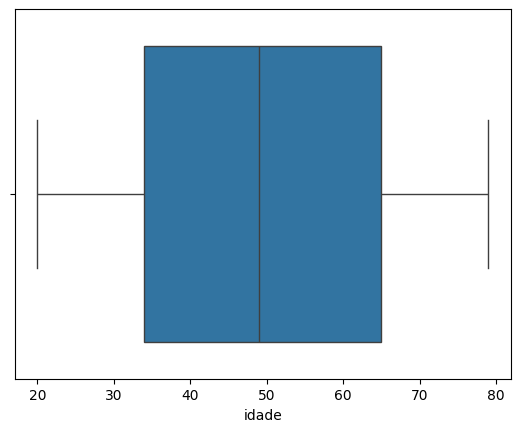

In [38]:
# Verificar / detectar outliers

sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

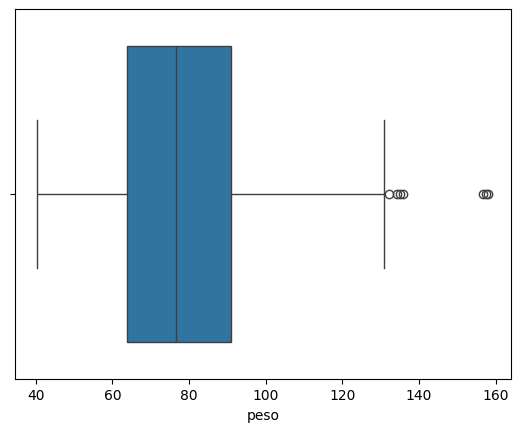

In [39]:
sns.boxplot(data=df_colesterol_eda, x='peso')

In [40]:
# Filtrar o publico a ser removido
df_colesterol_eda[df_colesterol_eda.peso < 40].peso.count()

np.int64(0)

In [41]:
# Remover publico do dateframe
# Considerando um range de pessoas de 20 a 80 anos o peso muito baixo nao faz sentindo.
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda.peso < 40].index,axis=0, inplace=True)

<Axes: xlabel='altura'>

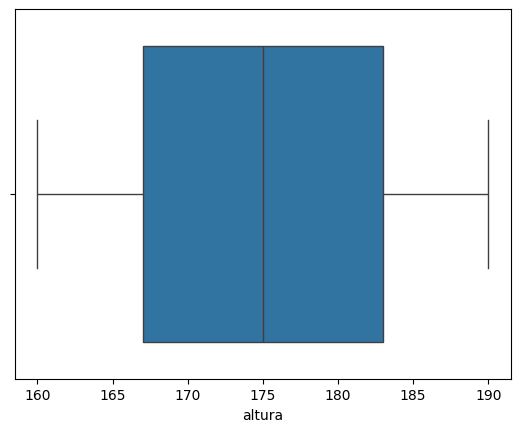

In [42]:
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='nivel_colesterol'>

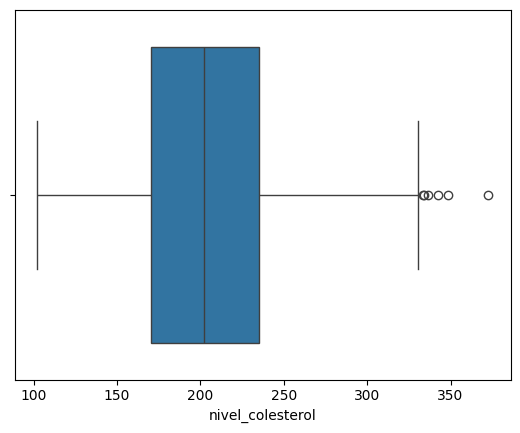

In [43]:
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')
# Possui outliers mas esses especificamentes fazem sentido, por que pode haver pessoas com um novel de colestorol bem alto

Análise Gráfica - Variáveis Categóricas x Target

Continuamos nossa análise exploratória de dados, agora focando em cruzamentos entre variáveis categóricas e o nível de colesterol. Utilizamos o boxplot para visualizar a variação do nível de colesterol de acordo com diferentes categorias, como grupo sanguíneo, tabagismo e nível de atividade física. Observamos que o grupo sanguíneo pode influenciar o nível de colesterol, com os tipos O e B apresentando níveis menores em comparação aos tipos A e AB. Além disso, identificamos que fumantes tendem a ter níveis mais altos de colesterol, enquanto pessoas com alto nível de atividade física apresentam níveis mais baixos. Esses padrões são importantes para a construção do modelo preditivo.

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

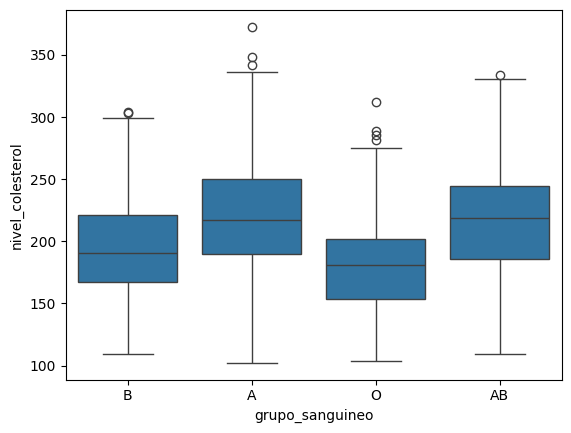

In [44]:
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='nivel_colesterol')

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

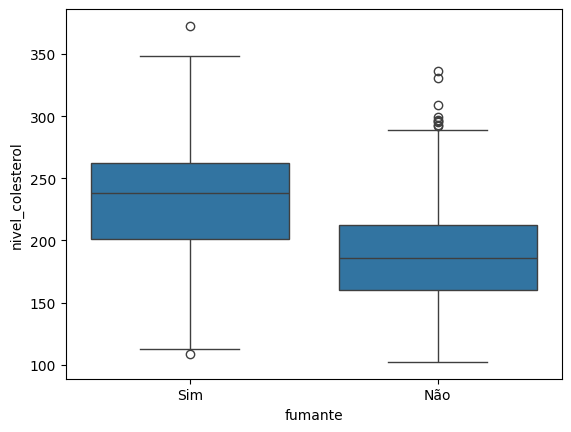

In [45]:
sns.boxplot(data=df_colesterol_eda, x='fumante', y='nivel_colesterol')

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

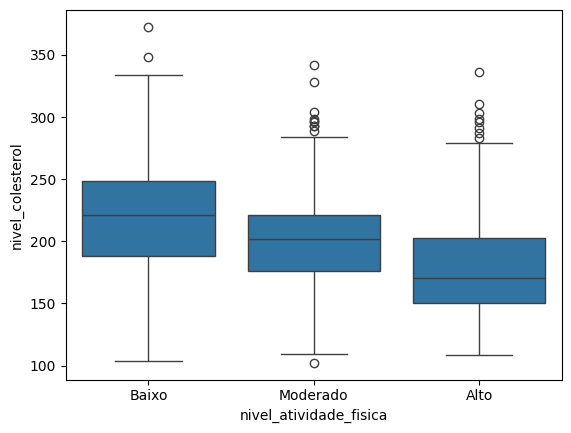

In [46]:
sns.boxplot(data=df_colesterol_eda, x='nivel_atividade_fisica', y='nivel_colesterol')

Analisamos a relação entre o peso e o nível de colesterol. Observamos que, em geral, há uma tendência de que quanto maior o peso, maior o nível de colesterol. No entanto, também identificamos outliers, ou seja, valores de colesterol muito altos para pesos muito altos. Se encontrássemos casos de pessoas com pesos altos e níveis de colesterol baixos, seria algo estranho. Em seguida, analisamos a relação entre a altura e o nível de colesterol, e não encontramos um padrão claro. Concluímos essa parte da análise e nos preparamos para a próxima etapa, que é cruzar as variáveis numéricas com a variável dependente, o nível de colesterol.

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

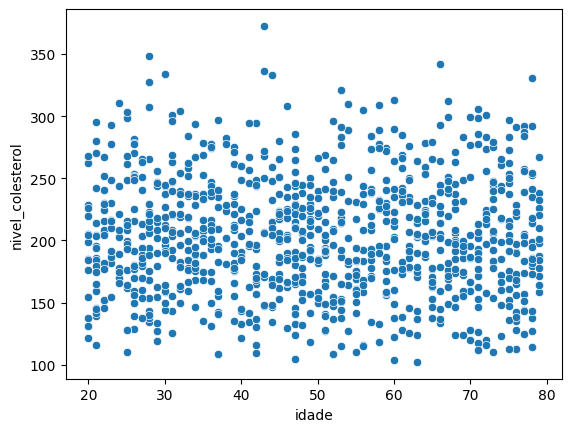

In [50]:

# Cruzamento de variaveis numericas com nivel colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='nivel_colesterol')

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

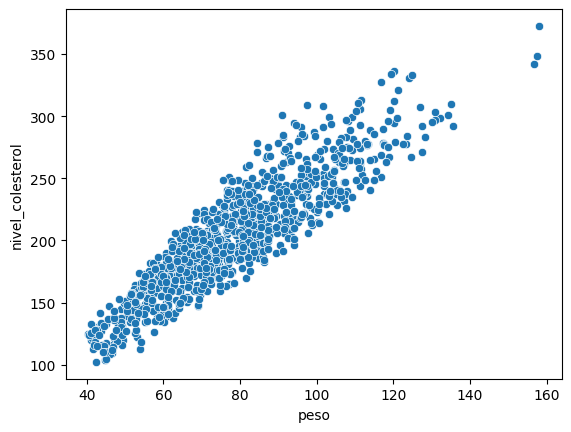

In [52]:
sns.scatterplot(data=df_colesterol_eda, x='peso', y='nivel_colesterol')

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

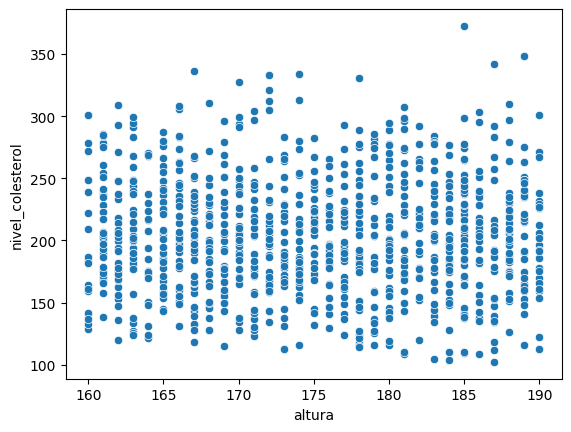

In [54]:
sns.scatterplot(data=df_colesterol_eda, x='altura', y='nivel_colesterol')

Vamos analisar a distribuição das variáveis numéricas e procurar por correlações entre elas. Utilizaremos o Seaborn para criar um gráfico chamado pairplot, que mostrará a distribuição das variáveis e suas correlações visuais. Observamos que o peso tem uma correlação positiva com o nível de colesterol, ou seja, quanto maior o peso, maior o nível de colesterol. A altura e a idade estão bem distribuídas ao longo do conjunto de dados. Não encontramos outras correlações significativas entre as variáveis independentes, o que é bom para evitar multicolinearidade em nosso modelo.

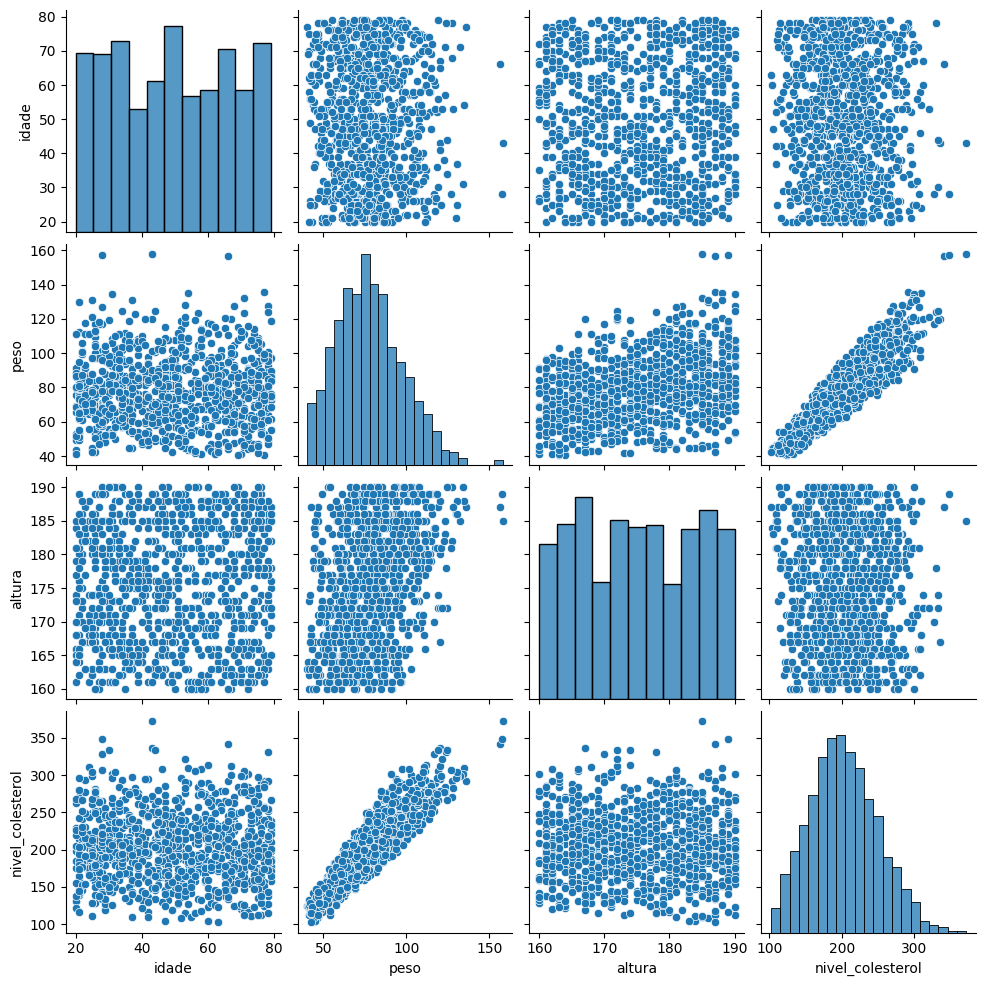

In [55]:
sns.pairplot(df_colesterol_eda)

 Aprendemos como converter variáveis categóricas em numéricas para análise de correlação. Utilizamos o método get_dummies do Pandas para converter as variáveis nominais, como fumante e grupo sanguíneo, em variáveis binárias. Em seguida, utilizamos o método factorize para converter a variável ordinal de nível de atividade física em valores numéricos. Com o DataFrame preparado, plotamos um heatmap de correlação usando o Seaborn, onde observamos as correlações entre as variáveis. Identificamos que o peso tem uma correlação forte com o nível de colesterol, assim como o fato de ser fumante e o tipo sanguíneo. Também notamos uma correlação negativa entre o nível de colesterol e o nível de atividade física

In [ ]:
# Converter variaveis categoricas nominais em numericas, usando One-hot encoder do pandas

df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [ ]:
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Moderado,31,68.1,166,206.81,0,1,0,0,0,1
996,Alto,51,47.7,170,128.03,0,0,0,1,1,0
997,Baixo,39,85.5,176,211.14,0,1,0,0,1,0
998,Baixo,61,91.2,161,284.53,0,1,0,0,0,1


In [58]:
# Converter variaveis categoricas ordinal em numericas, usando Factorize do pandas

df_colesterol_eda['nivel_atividade_fisica'] = pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0] + 1

In [59]:
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,1,33,85.1,186,199.63,0,0,1,0,0,1
1,2,68,105.0,184,236.98,1,0,0,0,1,0
2,3,25,64.8,180,161.79,0,0,0,1,1,0
3,3,43,120.2,167,336.24,1,0,0,0,1,0
4,1,79,88.5,175,226.23,0,1,0,0,1,0
5,1,68,66.8,170,185.31,0,0,1,0,1,0
6,1,60,117.3,181,289.33,1,0,0,0,0,1
7,2,35,86.9,174,216.48,0,0,0,1,0,1
8,1,62,81.3,166,235.30,0,0,0,1,1,0
10,1,57,123.6,183,283.87,1,0,0,0,0,1


<Axes: >

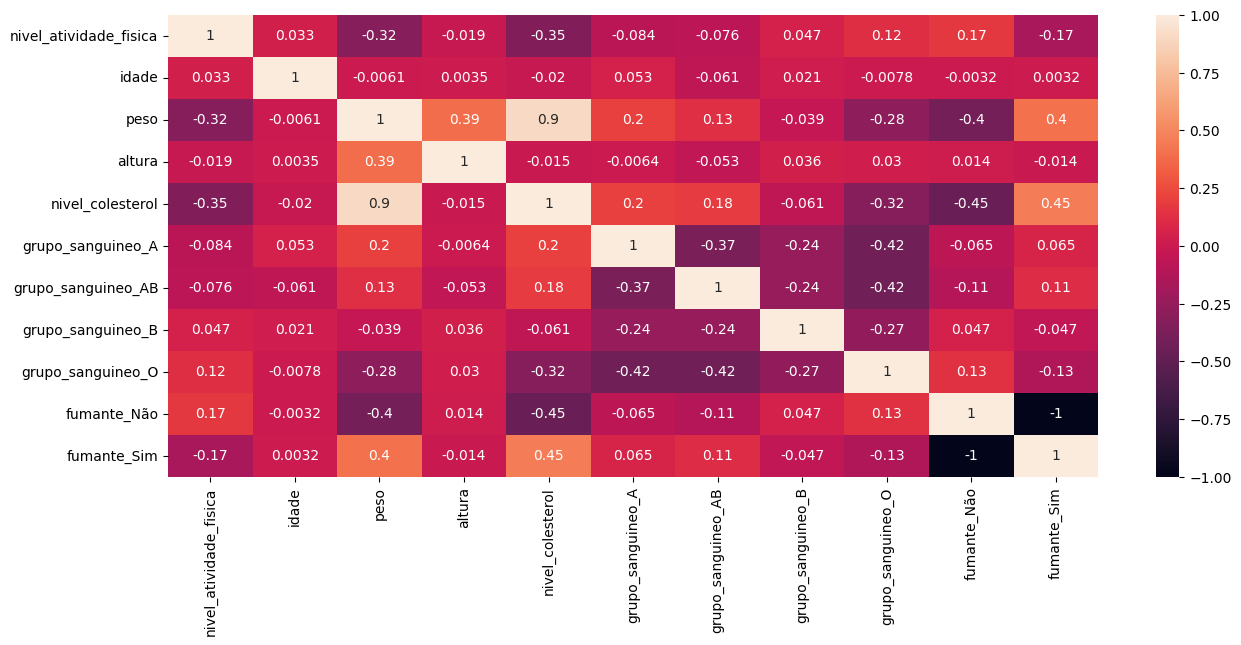

In [ ]:
# Mapa de calor com correlação entre as variáveis 
plt.figure(figsize=(15,6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

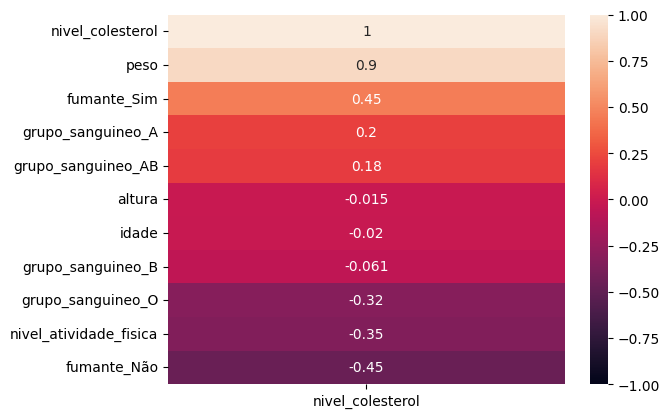

In [65]:
# Formato de Ranking, somente correlação com a variavel target (nivel_colesterol)
sns.heatmap(df_colesterol_eda.corr()[['nivel_colesterol']].sort_values(by='nivel_colesterol', ascending=False), vmin=-1, vmax=1, annot=True)

Aprendemos sobre o conceito de bucketing e como aplicá-lo usando a biblioteca Pandas em Python. O bucketing é útil quando queremos analisar ranges de valores em vez de valores individuais. No exemplo dado, criamos buckets para a variável idade, dividindo-a em faixas de 10 anos. Também mostramos como fazer o mesmo para a variável peso. Em seguida, utilizamos gráficos de boxplot para visualizar os agrupamentos e identificar possíveis padrões ou outliers. No caso da idade, não encontramos um padrão claro em relação ao nível de colesterol, ao contrário do que aconteceu com o

In [73]:
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29','30-39','40-49','50-59','60-69','70-79']

df_colesterol_bucketing['escala_idade'] = pd.cut(x = df_colesterol_bucketing['idade'], bins =bins_idade, labels=labels_idade, include_lowest=True)

In [74]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

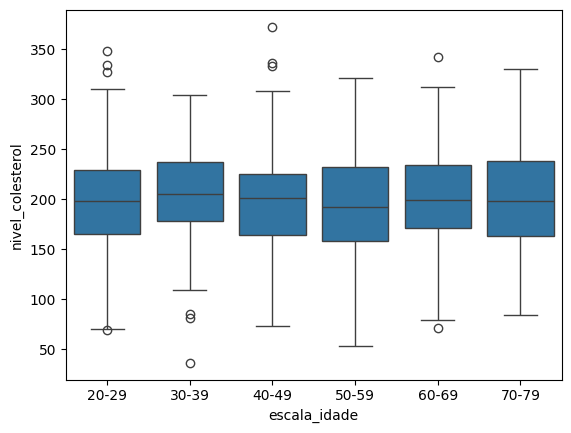

In [75]:
sns.boxplot(df_colesterol_bucketing, x='escala_idade', y='nivel_colesterol')

In [78]:
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119','120-129','130-139','140-149','150-159']

df_colesterol_bucketing['escala_peso'] = pd.cut(x = df_colesterol_bucketing['peso'], bins =bins_peso, labels=labels_peso, include_lowest=True)

In [79]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade,escala_peso
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-89
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69,100-109
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-69
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79,80-89
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59,110-119
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39,80-89
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69,80-89
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49,NaN


<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

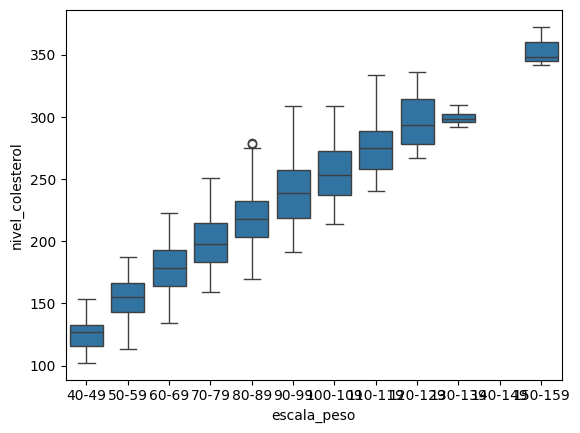

In [80]:
sns.boxplot(df_colesterol_bucketing, x='escala_peso', y='nivel_colesterol')

## Preparação do Dataset para Treinamento

Vamos começar a treinar nosso modelo de predição de colesterol com base em um conjunto de dados. Para isso, vamos utilizar o conceito de pipeline do sklearn, que nos ajuda a automatizar o processo de transformação das variáveis independentes antes de entrar no modelo. Vamos importar os módulos necessários do sklearn, como o modelSelection, linear regression e preprocessing. Também vamos utilizar o column transformer para transformar as colunas de acordo com nossa necessidade. Além disso, vamos tratar os valores ausentes e importar as métricas r2score, minabsoluteerror e minsquarederror. Após preparar o dataframe e fazer o split dos dados de treino e teste, vamos construir o pipeline para treinar nosso modelo.

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


In [82]:
# Criar dataset de treino e teste

# Remover publico do dateframe
# Considerando um range de pessoas de 20 a 80 anos o peso muito baixo nao faz sentindo.
df_colesterol.drop(df_colesterol[df_colesterol.peso < 40].index,axis=0, inplace=True)

In [91]:
df_colesterol.info()

<class 'pandas.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         960 non-null    str    
 1   fumante                 960 non-null    str    
 2   nivel_atividade_fisica  959 non-null    str    
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), str(3)
memory usage: 60.2 KB


In [99]:
X = df_colesterol.drop(columns='nivel_colesterol',axis=0)
y = df_colesterol['nivel_colesterol']


In [102]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [ ]:
X_train.shape
#(Registros, Variaveis )

(674, 6)

In [ ]:
X_test.shape
#(Registros, Variaveis )

(289, 6)

In [ ]:
y_test.shape
#(Registros, Variaveis )

(289,)

In [120]:
# Pipeline
# Imputar moda nas variaveis categoricas - Grupo_Sanguineo, fumante, nivel_atividade_fisica
# Padronizar variáveis numericas - idade, altura, peso
# OneHotEncode nas variaveis categoricas nominais - grupo_sanguineo, fumante
# OrdinalEncoder nas variáveis categóricas ordinais - nivel_atividade_fisica
# Imputar mediana nas variaveis numericas -  idade, altura, peso


# Nomes das colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'altura', 'peso']
colunas_ordinais = ['nivel_atividade_fisica']

transforme_categorias =  Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [121]:
# Tranformer Ordinais

transforme_ordinais =  Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado','Alto']], handle_unknown='error'))
])

In [122]:
# Transformer Numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## Treinamento do Modelo com Pipeline

 Criamos um Pipeline principal para pré-processar os dados e treinar um modelo de regressão linear. O Pipeline é composto por dois steps: o pré-processamento, que transforma as colunas no formato necessário, e o treinamento do modelo. Utilizamos o objeto Pipeline para criar essa estrutura. Em seguida, treinamos o modelo utilizando o método fit, passando o conjunto de treinamento. O Pipeline executa todas as etapas de uma vez, incluindo o pré-processamento e a regressão linear. Podemos visualizar a estrutura do Pipeline e analisar as métricas do modelo treinado.

In [123]:
# Criar um ColumnTransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transforme_categorias, colunas_categoricas),
        ('ord', transforme_ordinais, colunas_ordinais)
    ]
)

In [124]:
# Criando o Pipeline principal = Pre Processamento 
model_regr = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])

In [125]:
# Treinar Modelo
model_regr.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transf

## Validação de Modelo 
 
 Vamos analisar as métricas do nosso modelo de predição. Primeiro, vamos gerar a predição usando o conjunto de teste. Em seguida, calcularemos o R2Score, que mede o quão bem as variáveis independentes explicam a variância da variável dependente. Um valor próximo de 1 indica um bom modelo. Também calcularemos o MinAbsoluteError, que mede a diferença média entre os valores preditos e reais, e o RMSE, que leva em conta os outliers. Vamos analisar essas métricas para avaliar a qualidade do nosso modelo.

### Análise de Métricas

In [126]:
# GERAR PREDIÇÃO

y_pred = model_regr.predict(X_test)

In [ ]:
# Calcular R2 Score
# Obs: Quanto mais proximo de 1 melhor
r2_score(y_test, y_pred)

0.9594250724093464

In [ ]:
## Calcular o MAE ( Mean Absolute Error )
## Significa que ele errou na media 7 miligramas por decilitros por exemplo
# O ideal pra saber se é alto é conversar com um especialista
mean_absolute_error(y_test, y_pred)

7.313838031022503

In [133]:
# Calcular RMSE ( Root Mean Absolute Error )

root_mean_squared_error(y_test, y_pred)

9.097649246487032

### Análise Gráfica de Resíduos

Vamos analisar os resíduos do nosso modelo de regressão. Vamos calcular os resíduos e transformá-los na escala padrão. Em seguida, faremos uma análise gráfica para verificar a linearidade e a homoscedasticidade dos resíduos. Utilizaremos o scatter plot do Seaborn para plotar o gráfico. Observaremos se os valores estão próximos da reta de 45° e se estão dentro da banda de segurança. Além disso, faremos testes estatísticos para confirmar se os resíduos seguem uma distribuição normal. Utilizaremos o gráfico QQ-Plot do módulo Penguin para verificar a normalidade dos resíduos.

In [134]:
residuos = y_test - y_pred

In [136]:
# Transformar redisuos na escala padrão
# (X - media) / desvio_padrao

from scipy.stats import zscore

residuos_std = zscore(residuos)

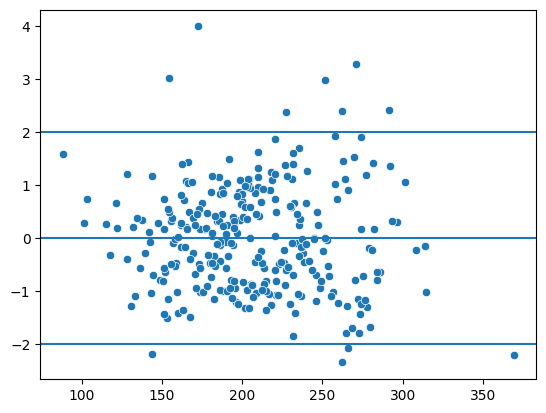

In [143]:
# Verificar linearidade dos residuos: Valores entre -2 e +2
# Verificar homocedasticidade: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

Text(0, 0.5, 'Resíduos na escala padrão')

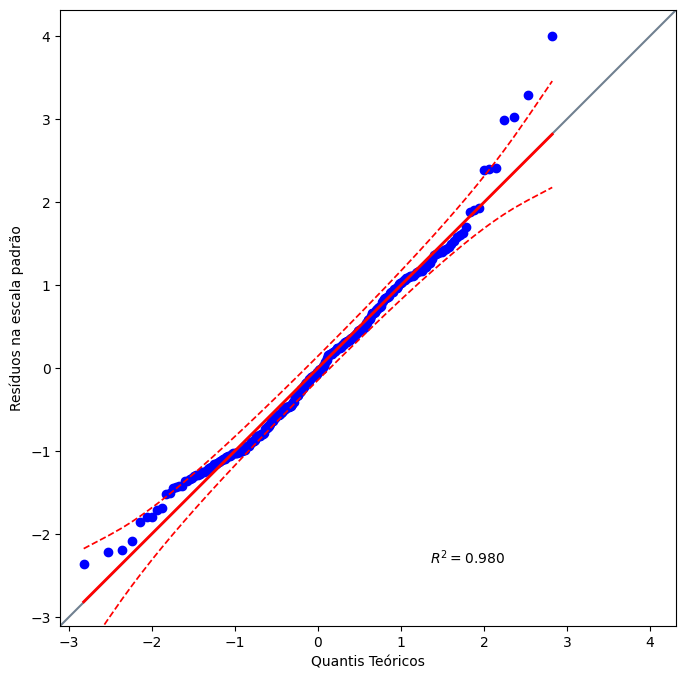

In [148]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot

import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

### Teste de Normalidade dos Resíduos

Vamos realizar testes estatísticos para verificar a normalidade dos resíduos. Vamos utilizar os testes de Shapiro-Wilk, Kolmogorov-Smirnov, Lillliefors e Anderson-Darling. Primeiro, importamos os módulos necessários do SciPy e StatsModels. Em seguida, executamos o teste de Shapiro-Wilk, que retorna a estatística do teste e o valor P. Se o valor P for menor que 0.005, podemos rejeitar a hipótese nula de que os resíduos seguem uma distribuição normal. Em seguida, realizamos o teste de Kolmogorov-Smirnov, que também indica a falta de normalidade nos resíduos. Por fim, realizamos o teste de Lillliefors, que indica a normalidade dos resíduos. Para complementar, realizamos o teste de Anderson-Darling, comparando a estatística do teste com os valores críticos para diferentes níveis de significância. Concluímos que três dos quatro testes indicam a falta de normalidade nos resíduos.

In [151]:
# Teste de Normalidade de Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatistica do Teste: {} e P-Value: {}".format(stat_shapiro, p_value_shapiro))

# Nesse caso, poderiamos reijeitar uma hipose nula, Os residuos não seguem uma distribuição normal, o P-Value está a baixo de 0.005


Estatistica do Teste: 0.9807737729720729 e P-Value: 0.0006268860444489818


In [153]:
# Teste de Kolmorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print("Estatistica do Teste: {} e P-Value: {}".format(stat_ks, p_value_ks))

# Aqui confirmar que não a normalidade nos residuos, podemos rejeitar H-0

Estatistica do Teste: 0.42455920998485785 e P-Value: 8.92583319090192e-48


In [155]:
# Teste de Lilliefors
stat_ll, p_value_ll = lilliefors(residuos,  dist='norm', pvalmethod='table')
print("Estatistica do Teste: {} e P-Value: {}".format(stat_ll, p_value_ll))


Estatistica do Teste: 0.049553710301929066 e P-Value: 0.12533323720735978


In [173]:
resultado = anderson(
    residuos,
    dist='norm',
    method='interpolate'  # ou método MonteCarlo
)

print("Estatística:", resultado.statistic)

Estatística: 0.9169275158490109


### Teste de Homocedasticidade dos Residuos
 Discutimos sobre o teste estatístico de homoscedasticidade, especificamente o teste de Goldfeld-Quandt. Para realizar esse teste, é necessário preparar os dados, incluindo os resíduos e as variáveis independentes. Como usamos um pipeline de pré-processamento, precisamos criar um novo pipeline apenas com esse passo. Em seguida, aplicamos o pipeline aos dados de teste e executamos o teste de Goldfeld-Quandt. Os resultados mostraram que não podemos rejeitar a hipótese nula, indicando que os resíduos têm variância homogênea em relação às variáveis independentes. Isso é um bom sinal para o modelo. Com isso, concluímos a análise de resíduos e estamos prontos para fazer previsões e entregar o modelo ao usuário final.

In [181]:
# Teste de Homocedasticidade de Goldfeld-Quandt

pipe = Pipeline(steps=[
    'preprocessor', preprocessor
])

X_test_transformed = preprocessor.fit_transform(X_test)

In [182]:
X_test_transformed

array([[-1.44340738, -0.58669129,  0.22608781, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.05685776, -1.20886474, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.35160806, -0.84754575, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.52702423, -1.09014564, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099, -0.35160806,  0.17447081, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.17439938, -1.65277092, ...,  0.        ,
         1.        ,  0.        ]], shape=(289, 10))

In [184]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)

stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]

print("Estatistica do Teste: {} e P-Value: {}".format(stat_goldfeld, p_value_goldfeld))

Estatistica do Teste: 0.6716135765253543 e P-Value: 0.9893959472385483


### Predi;áo de valores e salvando o modelo

Vamos aprender como fazer uma predição individual usando o modelo que construímos. Vamos passar os valores desejados para o modelo e ver qual valor ele retorna. É importante lembrar que, no nosso caso, temos uma lista de variáveis para passar. Essas variáveis precisam ser convertidas para que possam entrar no modelo. É aí que entra a beleza dos pipelines. Como já criamos um pipeline, ele já está pronto para receber os dados no seu estado natural e fazer a conversão necessária antes de rodar o modelo e nos trazer a predição. Vamos criar um dicionário com os dados que queremos prever, usando os mesmos nomes de variáveis do nosso dataset. Quando salvamos o modelo, ele salva o pipeline inteiro, não apenas o modelo de regressão linear. Vamos salvar o modelo em um arquivo chamado modelo_colesterol.pkl. Com isso, concluímos a parte de modelagem e salvamos o modelo. No próximo vídeo, mostraremos como criar uma interface visual simples para o usuário interagir com o modelo.

In [185]:
# Realizar prediçoes individuais

predicao_individual = {
    'grupo_sanguineo': 'O',
    'fumante' : 'Não',
    'nivel_atividade_fisica' : 'Alto',
    'idade': 40,
    'peso' : 70,
    'altura' : 180 
}

sample_df = pd.DataFrame(predicao_individual, index=[1])

In [186]:
sample_df

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura
1,O,Não,Alto,40,70,180


In [ ]:
# Predição
model_regr.predict(sample_df)

array([165.32375099])

In [188]:
import joblib

In [189]:
joblib.dump(model_regr, './modelo_colesterol.pkl')

['./modelo_colesterol.pkl']